In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.sans-serif'] = ['SimHei']  #防止中文乱码，还可以有Microsoft YaHei
plt.rcParams["axes.unicode_minus"] = False   #字符显示，防止负号乱码

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
time = pd.read_csv('data/time.csv')
pathLen = pd.read_csv('data/path_length.csv')

pathLen = pathLen.drop(['Unnamed: 0'], axis=1)
time = time.drop(['Unnamed: 0'], axis=1)

再跑一遍，看还有没有0

# path length

In [4]:
pathLen

,BFS,Dijkstra(1),Dijkstra(Haversine),Dijkstra(Euclidean),BellmanFord(1),BellmanFord(Haversine),BellmanFord(Euclidean),G_BFS(Haversine),G_BFS(Euclidean),"A_star(1, Euclidean)",...,"A_star(Euclidean, Euclidean)","A_star(Euclidean, Haversine)","A_star(Haversine, Euclidean)","A_star(Haversine, Haversine)","bi_A_star(1, Euclidean)","bi_A_star(1, Haversine)","bi_A_star(Euclidean, Euclidean)","bi_A_star(Euclidean, Haversine)","bi_A_star(Haversine, Euclidean)","bi_A_star(Haversine, Haversine)"
0,44.250734,44.250734,44.091351,44.091351,26.0,44.091351,0.542980,44.091351,44.091351,44.250734,...,44.091351,44.091351,44.091351,44.091351,44.250734,44.250734,44.091351,44.091351,44.091351,44.091351
1,54.253424,54.253424,53.390340,53.390340,34.0,53.390340,0.660838,54.772234,65.043604,54.253424,...,53.390340,53.390340,65.043604,53.390340,54.253424,54.253424,53.390340,53.390340,53.390340,53.390340
2,32.709901,32.709901,32.709901,32.709901,27.0,32.709901,0.345512,35.475398,35.475398,32.709901,...,32.709901,32.709901,35.475398,32.709901,32.709901,32.709901,32.709901,32.709901,32.709901,32.709901
3,44.685085,44.005565,42.107795,42.107795,31.0,42.107795,0.576313,42.517197,42.517197,44.005565,...,42.107795,42.107795,42.517197,42.107795,43.610122,43.610122,42.107795,42.107795,42.121754,42.107795
4,22.709124,22.709124,20.090581,20.091205,15.0,20.090581,0.227507,22.709124,37.092029,22.709124,...,20.091205,20.091205,21.418100,20.090581,22.072526,22.072526,20.091205,20.091205,20.090581,20.090581


# time

In [15]:
# real_time = pd.read_csv('data/real_time.csv')
# real_time = real_time.drop(['Unnamed: 0'], axis=1)
# num = (real_time == 0).sum(axis=0).to_frame()
# num.rename(columns={0:'Number of Time 0'}, inplace=True)
# num.to_csv("present/0.csv")
# plt.figure(figsize=(20,14))
# sns.set(font_scale = 1.4)
# sns.boxplot(data=np.log(real_time+0.5))

# plt.xticks(rotation = 90);

In [12]:
iterate_time = pd.read_csv('data/iterate_time.csv')
iterate_time = iterate_time.drop(['Unnamed: 0'], axis=1)
iterate_time.head()

,BFS,Dijkstra(1),Dijkstra(Haversine),Dijkstra(Euclidean),BellmanFord(1),BellmanFord(Euclidean),G_BFS(Haversine),G_BFS(Euclidean),"A_star(1, Euclidean)","A_star(1, Haversine)","A_star(Euclidean, Euclidean)","A_star(Euclidean, Haversine)","A_star(Haversine, Euclidean)","A_star(Haversine, Haversine)","bi_A_star(1, Euclidean)","bi_A_star(1, Haversine)","bi_A_star(Euclidean, Euclidean)","bi_A_star(Euclidean, Haversine)","bi_A_star(Haversine, Euclidean)","bi_A_star(Haversine, Haversine)"
0,47,49,61,63,93330,93330,17,17,44,44,23,59,17,24,306,306,315,311,371,319
1,205,206,186,206,93330,93330,26,26,194,194,29,192,26,30,306,306,332,309,541,330
2,226,230,223,218,93330,93330,24,98,225,225,56,212,235,49,306,306,321,309,540,323
3,75,72,113,122,93330,93330,17,17,66,66,25,113,17,30,306,306,320,314,475,320
4,221,223,207,218,93330,93330,14,13,202,202,39,204,13,48,306,306,324,312,473,324


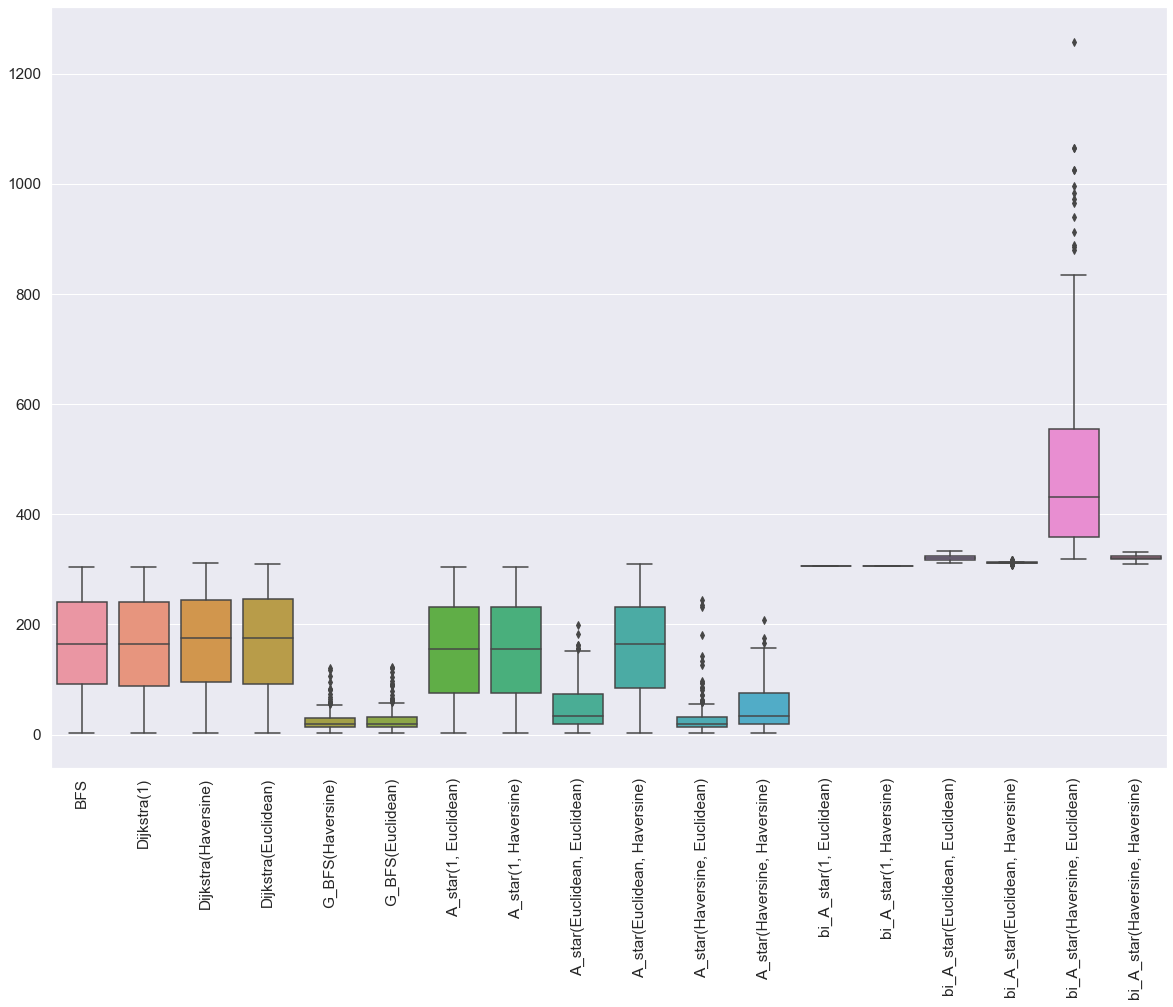

In [14]:
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.boxplot(data=iterate_time.drop(["BellmanFord(1)","BellmanFord(Euclidean)"], axis=1))

plt.xticks(rotation = 90);